# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

2.5 Inference: Basis on these predictions, what are the business insights and recommendations

Dataset for Problem 2: insurance_part2_data-1.csv

Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
data=pd.read_csv("insurance_part2_data.csv")

In [3]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [6]:
data.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [7]:
data.duplicated().sum()

139

In [8]:
data.median()

Age          36.00
Commision     4.63
Duration     26.50
Sales        33.00
dtype: float64

In [9]:
data.mode()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,36,EPX,Travel Agency,No,0.0,Online,8,20.0,Customised Plan,ASIA


In [10]:
range=data.max(numeric_only=float)-data.min(numeric_only=float)
print(range)

Age            76.00
Commision     210.21
Duration     4581.00
Sales         539.00
dtype: float64


In [11]:
data.skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

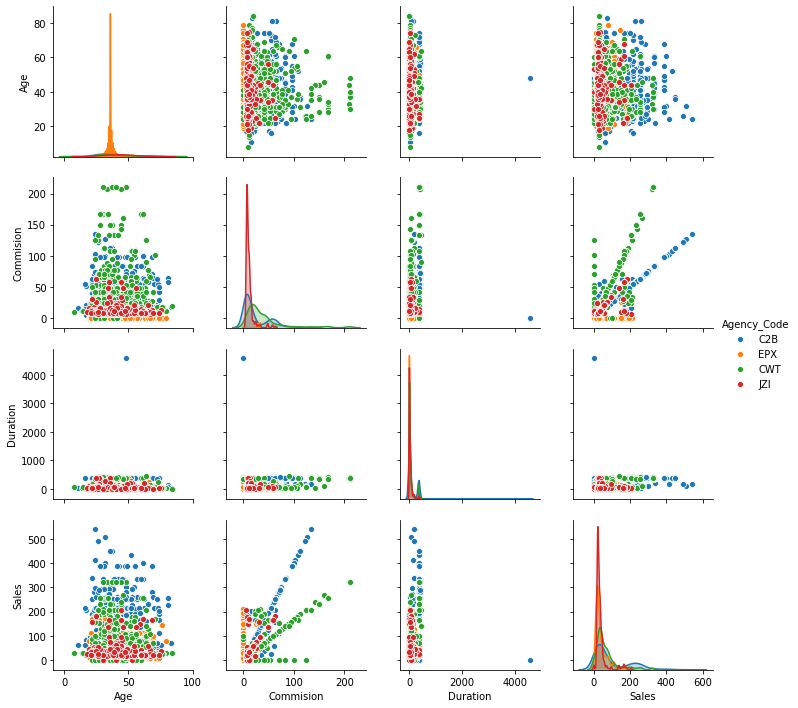

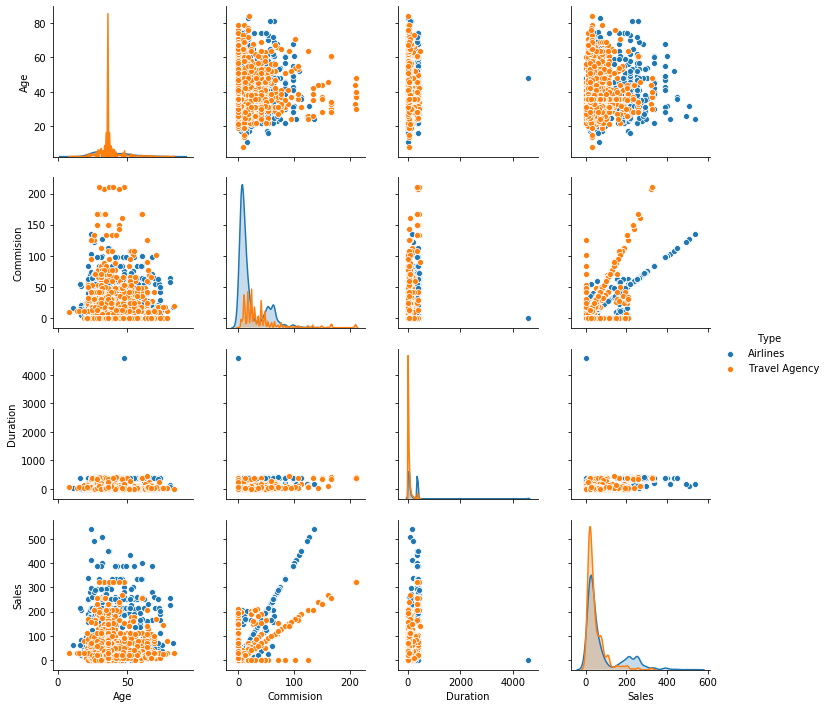

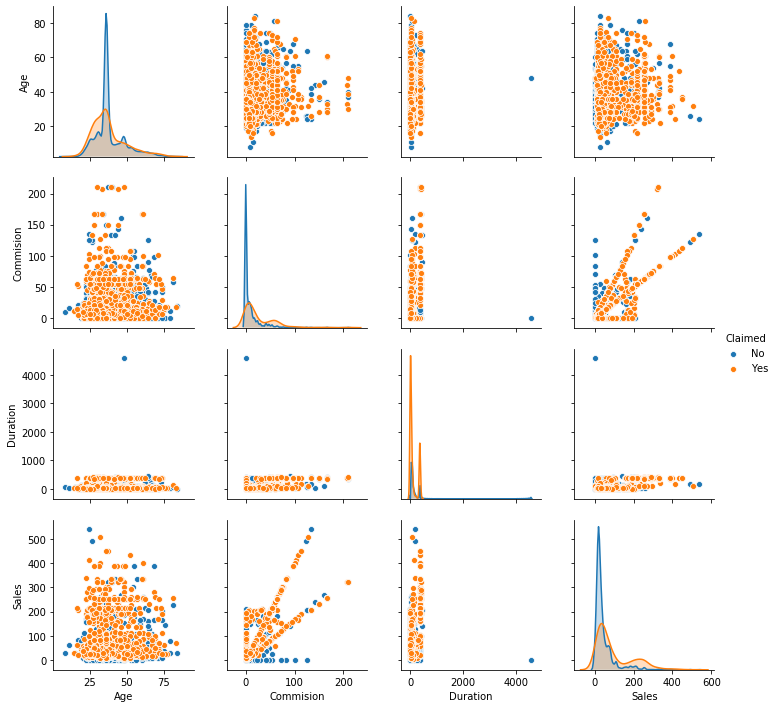

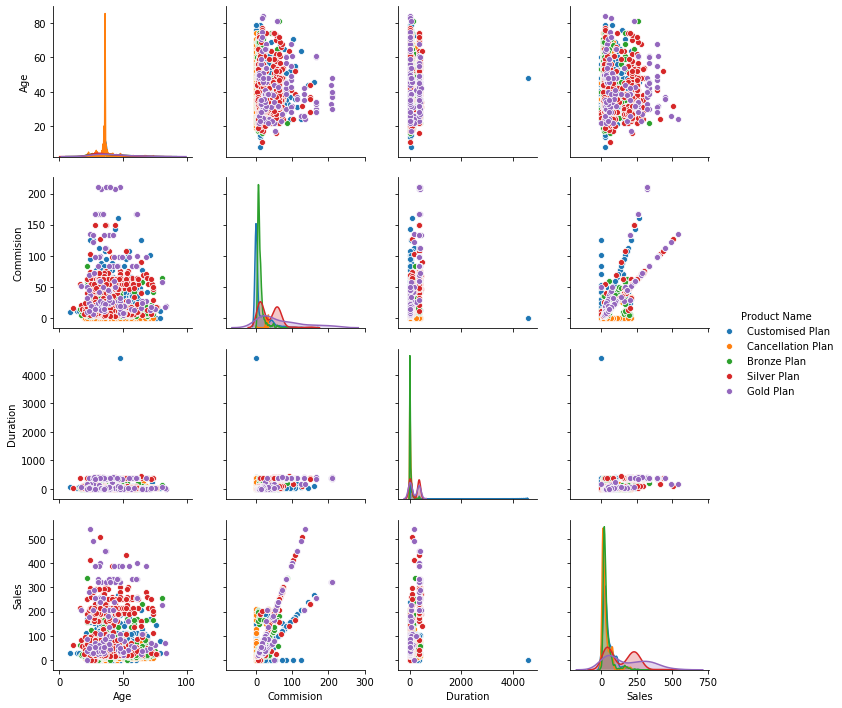

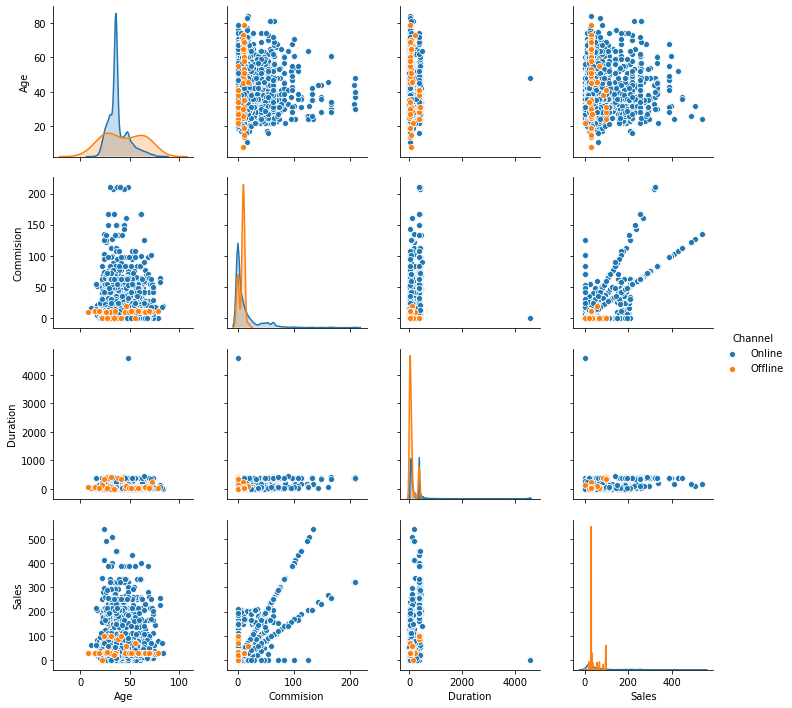

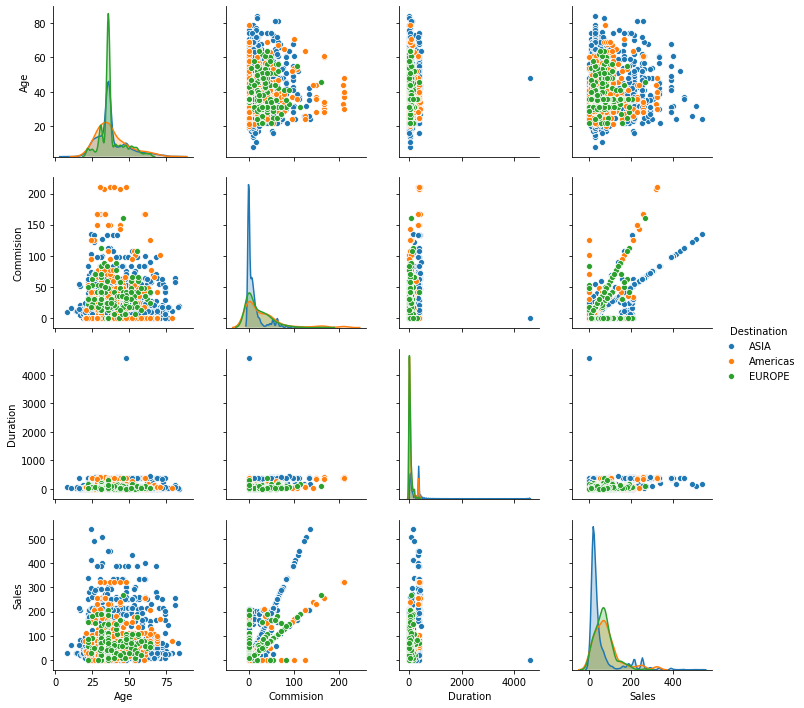

In [12]:
sns.pairplot(data,hue='Agency_Code')
sns.pairplot(data,hue='Type')
sns.pairplot(data,hue='Claimed')
sns.pairplot(data,hue='Product Name')
sns.pairplot(data,hue='Channel')
sns.pairplot(data,hue='Destination')

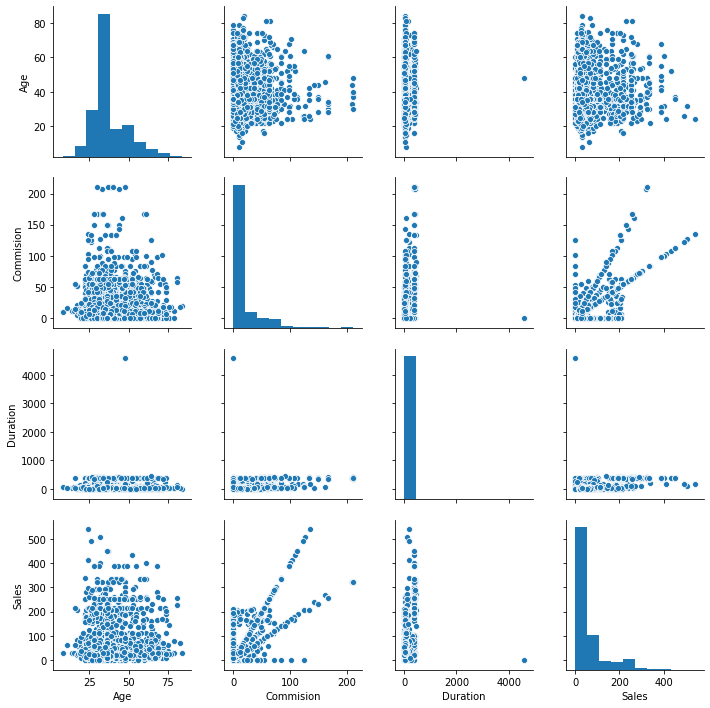

In [13]:
sns.pairplot(data)

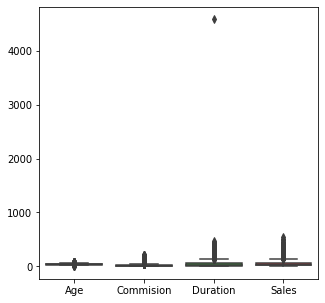

In [14]:
plt.subplots(figsize=(5,5))
sns.boxplot(data=data)

AxesSubplot(0.125,0.125;0.775x0.755)


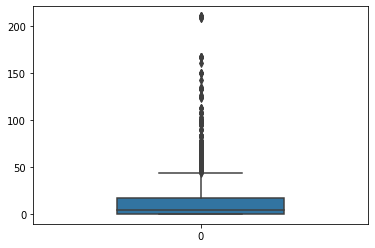

In [15]:
print(sns.boxplot(data=data['Commision'],width=0.5))


AxesSubplot(0.125,0.125;0.775x0.755)


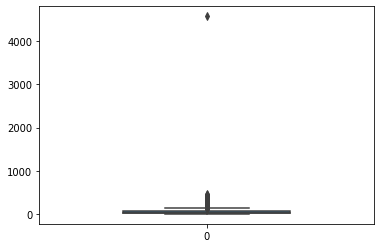

In [16]:
print(sns.boxplot(data=data['Duration'],width=0.5))

AxesSubplot(0.125,0.125;0.775x0.755)


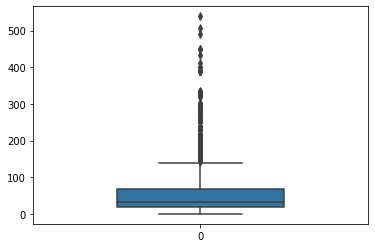

In [17]:
print(sns.boxplot(data=data['Sales'],width=0.5))

In [7]:
data.corr()

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030425,0.039455
Commision,0.067717,1.000000,0.471389,0.766505
Duration,0.030425,0.471389,1.000000,0.558930
Sales,0.039455,0.766505,0.558930,1.000000


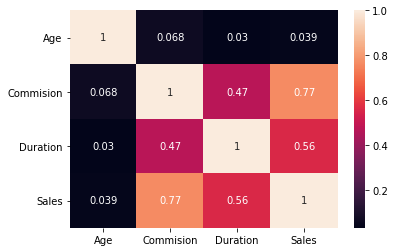

In [9]:
sns.heatmap(data.corr(),annot=True)

In [18]:
print("\n"pd.crosstab(data['Agency_Code'],data['Type']))
print("\n",pd.crosstab(data['Agency_Code'],data['Claimed']))
print("\n",pd.crosstab(data['Agency_Code'],data['Channel']))


 Type         Airlines  Travel Agency
Agency_Code                         
C2B               924              0
CWT                 0            472
EPX                 0           1365
JZI               239              0

 Claimed        No  Yes
Agency_Code           
C2B           364  560
CWT           331  141
EPX          1172  193
JZI           209   30

 Channel      Offline  Online
Agency_Code                 
C2B                0     924
CWT               40     432
EPX                6    1359
JZI                0     239


In [19]:
pd.crosstab(data['Claimed'],[data['Destination'],data['Product Name']],margins=True)

Destination         ASIA                                              \
Product Name Bronze Plan Cancellation Plan Customised Plan Gold Plan   
Claimed                                                                
No                   379               528             634        31   
Yes                  243                30             143        56   
All                  622               558             777        87   

Destination                 Americas                                    \
Product Name Silver Plan Bronze Plan Cancellation Plan Customised Plan   
Claimed                                                                  
No                   119          10                65             149   
Yes                  302           6                 7              61   
All                  421          16                72             210   

Destination                             EUROPE                    \
Product Name Gold Plan Silver Plan Bronze Plan Cancellation Plan   
Claimed                                                            
No                   6           2          10                42   
Yes                 11           3           2                 6   
All                 17           5          12                48   

Destination                                          All  
Product Name Customised Plan Gold Plan Silver Plan        
Claimed                                                   
No                        99         2           0  2076  
Yes                       50         3           1   924  
All                      149         5           1  3000

In [20]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("Before removing Outlier sum\n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())

def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
for feature in data[['Age','Commision','Duration','Sales']]: 
    lr,ur=treat_outlier(data[feature])
    data[feature]=np.where(data[feature]>ur,ur,data[feature])
    data[feature]=np.where(data[feature]<lr,lr,data[feature])

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("After removing Outlier sum\n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())

Before removing Outlier sum
 Age             204
Agency_Code       0
Channel           0
Claimed           0
Commision       362
Destination       0
Duration        382
Product Name      0
Sales           353
Type              0
dtype: int64
After removing Outlier sum
 Age             0
Agency_Code     0
Channel         0
Claimed         0
Commision       0
Destination     0
Duration        0
Product Name    0
Sales           0
Type            0
dtype: int64


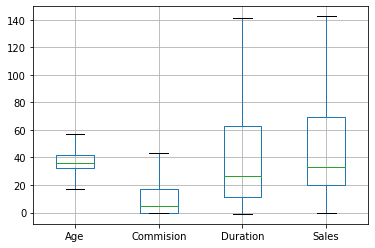

In [21]:
data.boxplot()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null float64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null float64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(4), object(6)
memory usage: 234.5+ KB


In [23]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        data[feature] = pd.Categorical(data[feature]).codes

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null float64
Agency_Code     3000 non-null int8
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null float64
Channel         3000 non-null int8
Duration        3000 non-null float64
Sales           3000 non-null float64
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(4), int8(6)
memory usage: 111.4 KB


In [25]:
x = data.drop("Claimed" , axis=1)
y = data.pop("Claimed")

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

# Decision Tree Classifier

In [27]:
dt_model = DecisionTreeClassifier(criterion = 'gini')

In [28]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ins_Tree_File = open('d:\ins_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=ins_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))

ins_Tree_File.close()

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10,11,12,13],
    'min_samples_leaf': [15, 20, 25],
    'min_samples_split': [45, 60, 75]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [31]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [10, 11, 12, 13],
                         'min_samples_leaf': [15, 20, 25],
                     

In [32]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 25, 'min_samples_split': 60}

In [33]:
best_grid = grid_search.best_estimator_

In [34]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1471
           1       0.70      0.57      0.63       629

    accuracy                           0.80      2100
   macro avg       0.77      0.73      0.75      2100
weighted avg       0.79      0.80      0.79      2100



In [37]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.44      0.54       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



AUC: 0.858


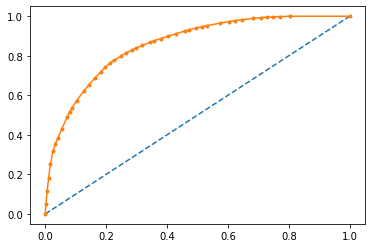

In [38]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.785


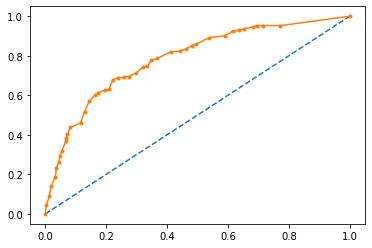

In [39]:
# AUC and ROC for the test data
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Random forest

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10, 11,12],
    'max_features': [5,6,7],
    'min_samples_leaf': [20, 25],
    'min_samples_split': [60, 75],
    'n_estimators': [101, 301]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [41]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [42]:
grid_search.best_params_

{'max_depth': 11,
 'max_features': 5,
 'min_samples_leaf': 20,
 'min_samples_split': 75,
 'n_estimators': 101}

In [43]:
best_grid = grid_search.best_estimator_

In [44]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [45]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1471
           1       0.72      0.58      0.64       629

    accuracy                           0.81      2100
   macro avg       0.78      0.74      0.76      2100
weighted avg       0.80      0.81      0.80      2100



In [46]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.46      0.57       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



AUC: 0.856


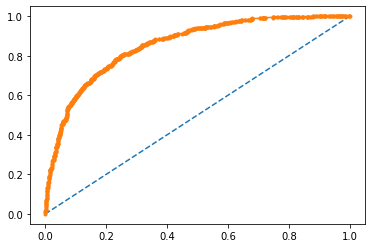

In [47]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.820


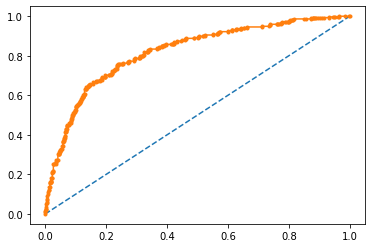

In [48]:
# AUC and ROC for the test data
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# MLP CLassifier

In [49]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
x_trains = sc.fit_transform(x_train) 
x_tests = sc.transform (x_test)

In [50]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [51]:
grid_search.fit(x_trains, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['logistic', 'relu'],
     

In [52]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [53]:
best_grid = grid_search.best_estimator_

In [54]:
ytrain_predict = best_grid.predict(x_trains)
ytest_predict = best_grid.predict(x_tests)

In [55]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1471
           1       0.72      0.51      0.60       629

    accuracy                           0.79      2100
   macro avg       0.77      0.71      0.73      2100
weighted avg       0.79      0.79      0.78      2100



In [56]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       605
           1       0.74      0.43      0.54       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.69       900
weighted avg       0.76      0.76      0.74       900



AUC: 0.845


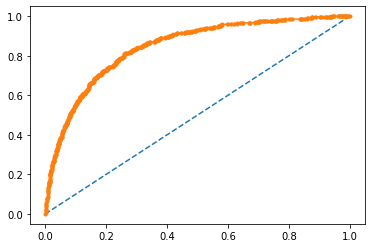

In [57]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(x_trains)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.812


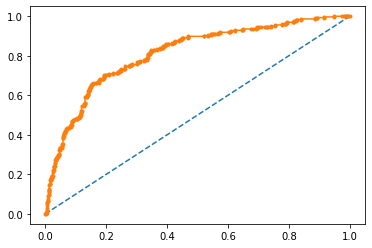

In [58]:
# AUC and ROC for the test data
# predict probabilities
probs = best_grid.predict_proba(x_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()